In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

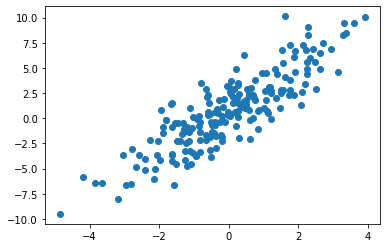

In [2]:
# For practice, create 200 random points that are aroud y = 1 + 2x
np.random.seed(123)

X = np.random.randn(200) * 1.5
res = np.random.randn(200) * 2.0
y = 1 + 2 * X + res

twoDData = np.c_[X, y]

plt.scatter(twoDData[:, 0], twoDData[:, 1])

In [3]:
# Use the PCA model to find what eigenvectors best explain the datasets
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(twoDData)

# The two eigenvectors best explaining the dataset
print(pca.components_)

[[-0.36114063 -0.93251137]
 [-0.93251137  0.36114063]]


In [4]:
print(pca.explained_variance_)

[15.48700484  0.5572397 ]


We find that the first eigenvector has a much higher explained variance value.

In [5]:
# Transform the original data using the first eigenvector
# (Transpose all datapoints onto the first eigenvector)
pca = PCA(n_components = 1)
pca.fit(twoDData)
twoDData_dr = pca.transform(twoDData)
print(f"shape of original: {twoDData.shape}")
print(f"shape of transposed: {twoDData_dr.shape}")

shape of original: (200, 2)
shape of transposed: (200, 1)


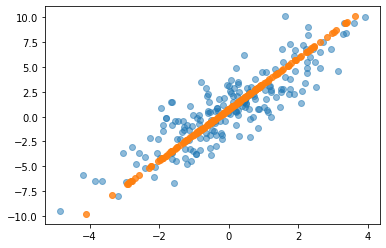

In [6]:
# Plot the transposed data set along with the original

## turn points in twoDData_dr into cartesian coordinates
twoDData_new = pca.inverse_transform(twoDData_dr)

## Plot
plt.scatter(twoDData[:, 0], twoDData[:, 1], alpha = 0.5)
plt.scatter(twoDData_new[:, 0], twoDData_new[:, 1], alpha = 0.8)

In [8]:
ICEdata = pd.read_csv('Downloads/ICE6_Data.csv')
print(ICEdata.head())

       id  prior_prob_count  prior_percent_correct  problems_attempted  \
0  172777               650               0.723077                   4   
1  175658              1159               0.800690                  22   
2  175669              1239               0.656981                  11   
3  176151              1246               0.729535                  16   
4  176165              1299               0.568129                   6   

   mean_correct  mean_hint  mean_attempt  mean_confidence  
0      1.000000   0.000000      1.000000         0.550159  
1      0.454545   2.227273      1.227273         0.437515  
2      0.636364   1.363636      1.727273         0.511060  
3      0.750000   0.562500      1.187500         0.491578  
4      0.333333   2.166667      2.000000         0.409887  


In [13]:
# Clean data (simply drop the id column)
ICEdata_clean = ICEdata.drop(['id'], axis = 1)

# Create PCA model
icepca = PCA(n_components = 7)
icepca.fit(ICEdata_clean)

print(f"The principal components are: \n{icepca.components_}")
print(f"The explained variances are: \n{icepca.explained_variance_}")

The principal components are: 
[[ 9.99998379e-01  3.25231653e-05  1.72229676e-03  6.65415156e-05
   4.97054823e-04  1.49367002e-04  1.15030348e-05]
 [-1.73541120e-03  1.03037706e-03  9.99602228e-01  2.30861751e-03
   2.23020180e-02  1.69662730e-02 -8.64582845e-04]
 [-3.87330335e-04 -3.27396081e-02 -2.70451869e-02 -1.24635620e-01
   6.73010236e-01  7.27812593e-01  2.92226368e-03]
 [ 2.29120283e-04  3.26414469e-02  3.68040760e-03  1.78860696e-01
  -7.05688901e-01  6.84765009e-01  5.46329794e-03]
 [ 1.63571033e-04 -1.96336169e-01  6.70115719e-03 -9.52166155e-01
  -2.19898499e-01  3.19977181e-02 -7.35362922e-02]
 [ 1.91456302e-05 -9.79282671e-01  7.60612436e-04  1.99617334e-01
  -2.17110326e-03 -7.96442781e-03  3.30097853e-02]
 [ 1.73255132e-06 -1.78647923e-02 -1.39538358e-03  7.74726598e-02
   1.42375081e-02  3.24800341e-03 -9.96726458e-01]]
The explained variances are: 
[1.01909636e+05 9.65917304e+01 8.07223611e-01 4.21069102e-01
 4.13364216e-02 1.60996431e-02 1.08938450e-02]


We see that the first two eigenvectors have two significantly higher explained variance values.

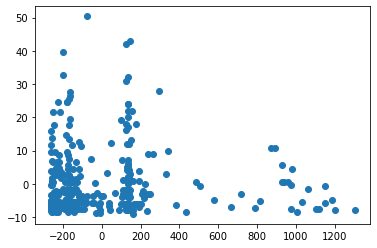

In [14]:
icedata_dr = icepca.transform(ICEdata_clean)
plt.scatter(icedata_dr[:, 0], icedata_dr[:, 1])

Given the above graph, the data points appear to be in three distinct clusters.

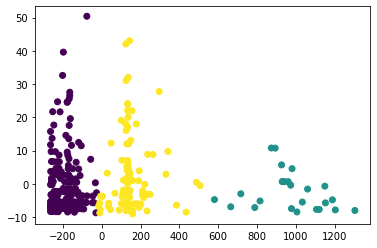

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(icedata_dr)
cluster_kmeans = kmeans.predict(icedata_dr)

plt.scatter(icedata_dr[:, 0], 
            icedata_dr[:, 1], 
            c = cluster_kmeans, 
            cmap = 'viridis')